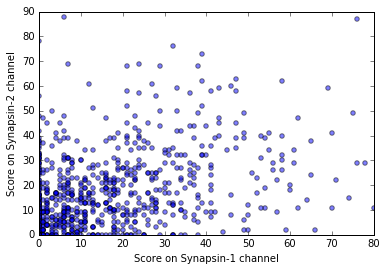

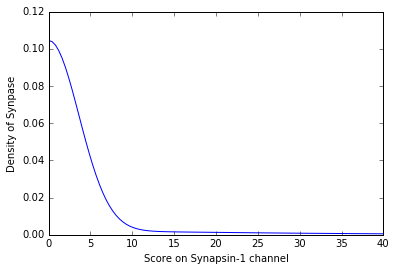

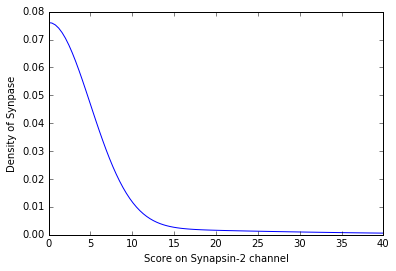

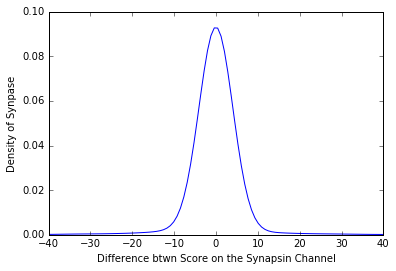

In [18]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import gaussian_kde


syn_positions = sio.loadmat('new_positions_data.mat')['syn']
sub_sample = np.random.permutation(len(syn_positions[:,0]))[1:10000]
synapsin1 = syn_positions[:,0].astype(float)
synapsin2 = syn_positions[:,1].astype(float)


plt.scatter(synapsin1[sub_sample], synapsin2[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()


density = gaussian_kde(synapsin1)
xs = np.linspace(0,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Density of Synpase")

plt.show()

density = gaussian_kde(synapsin2)
xs = np.linspace(0,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.xlabel("Score on Synapsin-2 channel")
plt.ylabel("Density of Synpase")

plt.show()

density = gaussian_kde(synapsin1[sub_sample] - synapsin2[sub_sample])
xs = np.linspace(-40,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.ylabel("Density of Synpase")
plt.xlabel("Difference btwn Score on the Synapsin Channel")
plt.show()


As recommended during class last Thursday, we set the threshold incrementally to reject more and more synapses each time. Plotted above are the density graph of the synapses scores for the synpaeses positions evalutaed with a even more relaxed threshold. As expected, most synpaes have a score on the lower end of the specturm. (The score is generated using a self-defined metric that evluated the neighborhood of a called synpase in the pivot position file). As expected, a lot of synpases either have a high score on the synapsisn-1 images or the synapsin-2 iamges, as shown by the scatter graph.

In [19]:
import pickle
raw_data = pickle.load(open('raw_data'))

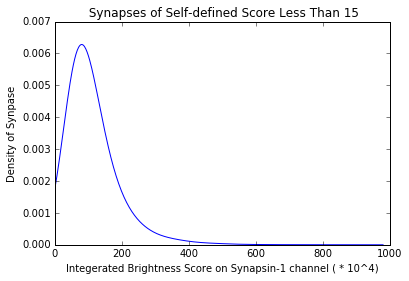

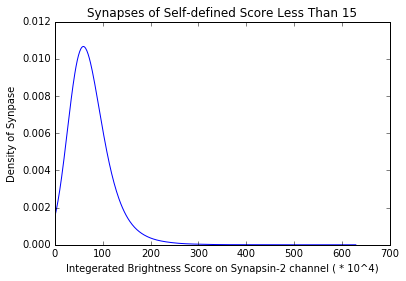

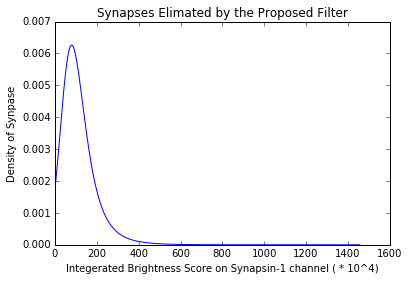

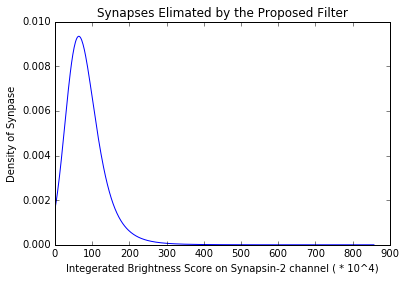

In [20]:
import statsmodels.api as sm
synapsin1_raw = np.array(raw_data[1])[0:1119259]
synapsin2_raw = np.array(raw_data[2])[0:1119259]
sub_sample = np.random.permutation(len(synapsin2_raw))[1:1000]

filter1 = synapsin1 > 15
synapsin1_raw_out = synapsin1_raw[filter1]
density = gaussian_kde(synapsin1_raw_out/10000)
xs = np.linspace(0,max(synapsin1_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title(" Synapses of Self-defined Score Less Than 15")
plt.xlabel("Integerated Brightness Score on Synapsin-1 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()


filter1 = synapsin2 > 15
synapsin2_raw_out = synapsin2_raw[filter1]
density = gaussian_kde(synapsin2_raw_out/10000)
xs = np.linspace(0,max(synapsin2_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses of Self-defined Score Less Than 15")
plt.xlabel("Integerated Brightness Score on Synapsin-2 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()

filter1 = (abs(synapsin1 - synapsin2) > 5) | (synapsin1 < 15) & (synapsin2 < 15)


synapsin1_raw_out = synapsin1_raw[filter1]
density = gaussian_kde(synapsin1_raw_out/10000)
xs = np.linspace(0,max(synapsin1_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Elimated by the Proposed Filter")
plt.xlabel("Integerated Brightness Score on Synapsin-1 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()



synapsin2_raw_out = synapsin2_raw[filter1]
density = gaussian_kde(synapsin2_raw_out/10000)
xs = np.linspace(0,max(synapsin2_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Elimated by the Proposed Filter")
plt.xlabel("Integerated Brightness Score on Synapsin-2 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()




We look at the integrated brighness score of the synapses that would be taken out by threshdoling on the score dervived from the evauluation of them on the raw images. Most of the synapses have integrated brightness score on the lower spectrum. The porposed filter was the filter used in the last assignment where a synapse would be taken out if its score across the two synapsin channels are too different. 

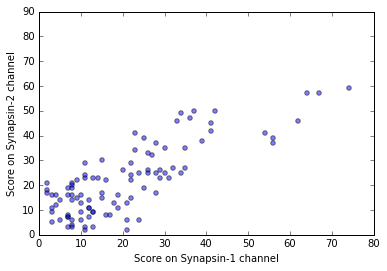

In [54]:
filter = (abs(synapsin1 - synapsin2) < 20) & (synapsin1 > 1) & (synapsin2 > 1)


synapsin1_sub = synapsin1[filter]
synapsin2_sub = synapsin2[filter]

sub_sample = np.random.permutation(len(synapsin1_sub))[1:100]

plt.scatter(synapsin1_sub[sub_sample], synapsin2_sub[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()


Last week we propose to build a filter that only keeps the synapse where the score for each of them based on the raw image across the two synapsin channel is consistent.

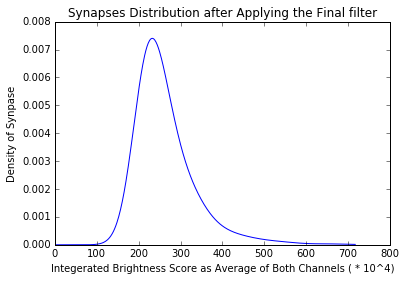

36
41
42
46
62
63
66
67
69
70
71
72
78
79
80
81
82
84
86
89
92
94
95
97
99
102
105
106
107
110
111
112
117
124
125
128
131
134
138
140
142
143
145
146
147
150
151
152
153
154
156
157
158
160
161
162
164
168
169
170
173
174
181
184
188
189
191
195
202
204
206
207
208
209
213
215
216
221
223
224
226
229
230
231
232
233
235
237
238
242
245
246
252
253
255
257
258
259
261
264
266
267
268
271
272
273
274
277
278
280
281
284
285
286
287
289
291
293
294
295
297
298
304
305
306
309
310
312
313
319
320
321
324
327
328
329
331
332
333
334
335
336
337
338
339
340
341
342
344
345
347
349
350
351
352
354
356
357
358
360
361
362
364
365
368
369
371
373
377
379
380
383
385
386
387
388
389
392
394
396
398
400
403
405
406
408
410
412
414
415
416
418
419
424
425
427
428
429
431
432
433
436
438
439
441
442
443
445
447
451
457
465
466
468
469
470
472
473
474
475
477
479
481
483
487
489
494
495
496
499
502
503
507
508
509
514
516
517
518
519
521
522
524
525
530
532
533
536
538
539
542
544
545
546
549
550
5

In [56]:
synapsin_average = (synapsin1_raw + synapsin2_raw) / 2
synapsin_filtered = synapsin_average[filter]
synapsin_filtered = synapsin_filtered[synapsin_filtered > 2000000 ] 


density = gaussian_kde(synapsin_filtered/10000)
xs = np.linspace(0,max(synapsin_filtered)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Distribution after Applying the Final filter")
plt.xlabel("Integerated Brightness Score as Average of Both Channels ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()

import scipy.stats as stats
k2, p = stats.normaltest(synapsin_filtered, axis=0)
#print k2, p

w = open('filter_point', 'w')



for index, point in np.ndenumerate(filter):

    if point == False:
        continue
   
    if (synapsin_average[index] > 200000):
        w.write(str(index[0]) + '\n')
        


After thresholding based on infroamtion form the raw images, also thresholding on Integrated Brightness by first taking the average between the two synapsin channels then applying a high-pass filter. The distribution of the synapses look less skewed to the left. 